In [15]:
%matplotlib inline

# **Nhận dạng chữ số viết tay** 
Sử dụng thư viện sklearn để nhận diện chữ số viết tay từ 0 - 9


In [5]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


# **Bộ dữ liệu**
Bộ dữ liệu về chữ số dưới đây là tập hợp của các ảnh với kích thước 8x8.


*   Trường images trong bộ dữ liệu của chúng ta là một tập hợp của các mảng có kích thước 8x8 với các giá trị mức xám cho mỗi ảnh
*   Trường target trong bộ dữ liệu chứa các giá trị là chữ số mà mỗi ảnh đại diện cho



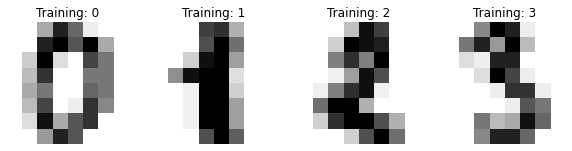

In [6]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

 Chúng ta cần vector hóa bức ảnh bằng cách biến đổi từ mảng hai chiều với **kích thước (8, 8) thành một vector với số chiều (64,)**

In [7]:

# làm phẳng hình
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# tạo bộ phân lớp : a support vector classifier
clf = svm.SVC(gamma=0.001)

# chia dữ liệu thành 50% test và 50% train
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# dùng bộ train để huấn luyện những con số
clf.fit(X_train, y_train)

# đoán số trên bộ test
predicted = clf.predict(X_test)

dưới đây là một số ví dụ trong bộ test

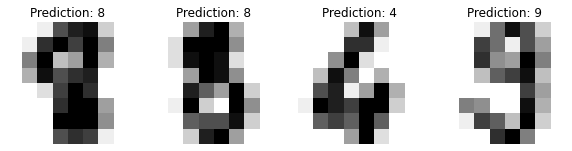

In [8]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [9]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


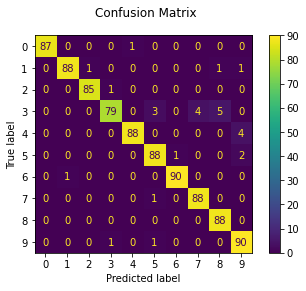

In [10]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# **sử dụng webcam để dự đoán hình ảnh đưa vào**

In [11]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


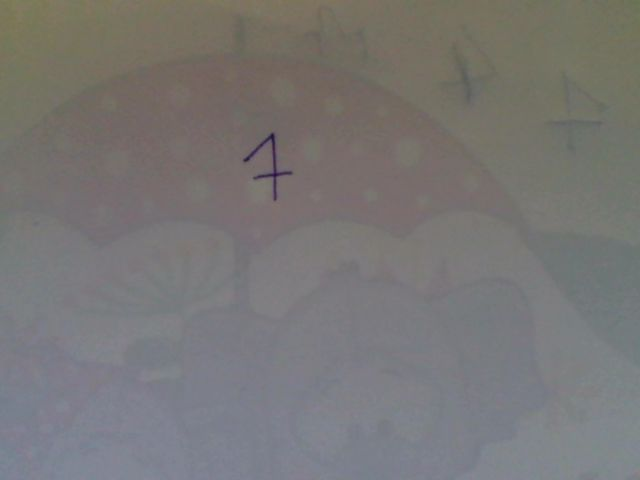

prediction:  [1]


<IPython.core.display.Javascript object>

Saved to photo.jpg


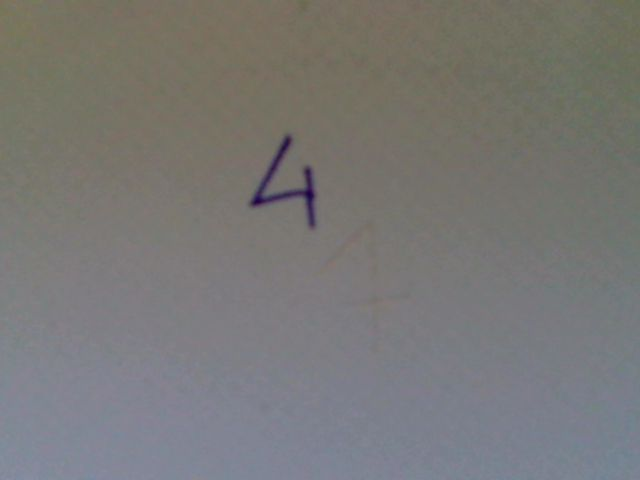

prediction:  [9]


<IPython.core.display.Javascript object>

Saved to photo.jpg


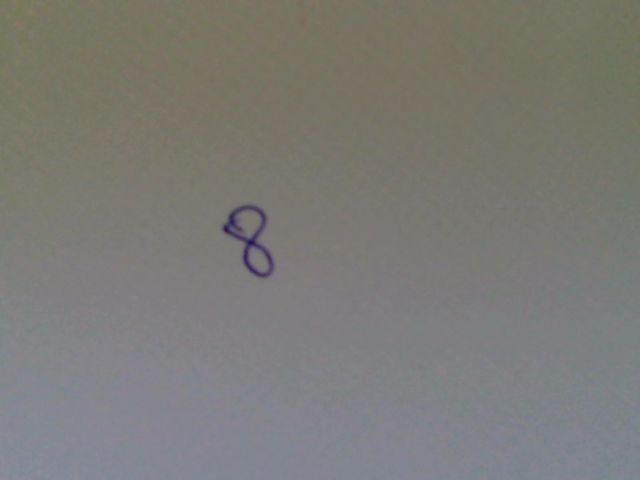

prediction:  [9]


<IPython.core.display.Javascript object>

Saved to photo.jpg


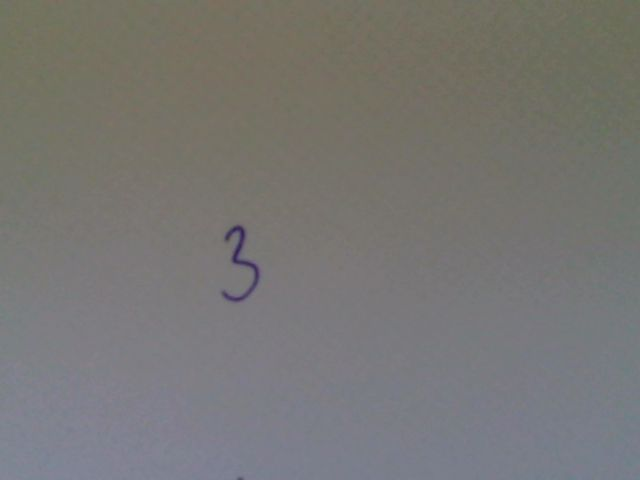

prediction:  [9]


<IPython.core.display.Javascript object>

Saved to photo.jpg


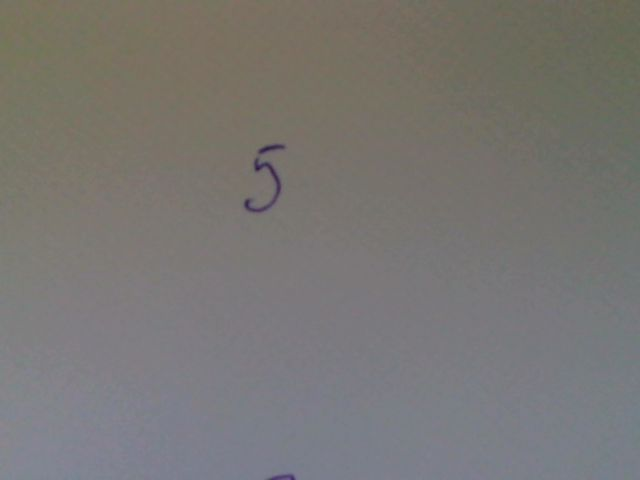

prediction:  [1]


<IPython.core.display.Javascript object>

Saved to photo.jpg


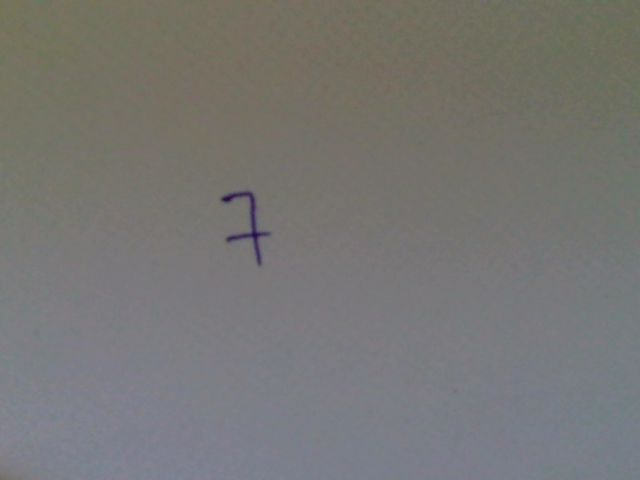

prediction:  [9]


<IPython.core.display.Javascript object>

Saved to photo.jpg


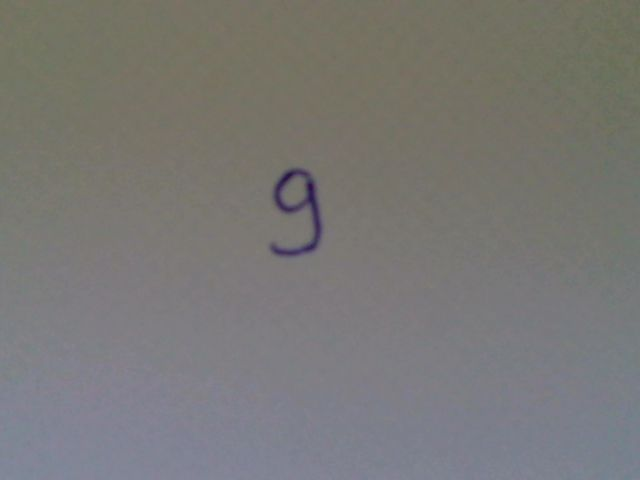

prediction:  [9]


<IPython.core.display.Javascript object>

Saved to photo.jpg


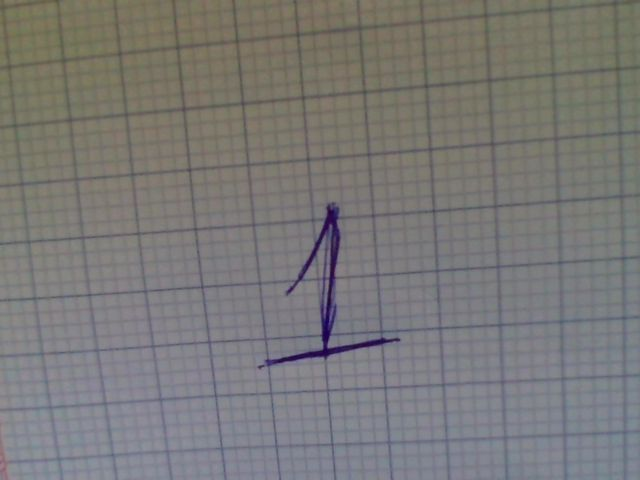

prediction:  [7]


<IPython.core.display.Javascript object>

Saved to photo.jpg


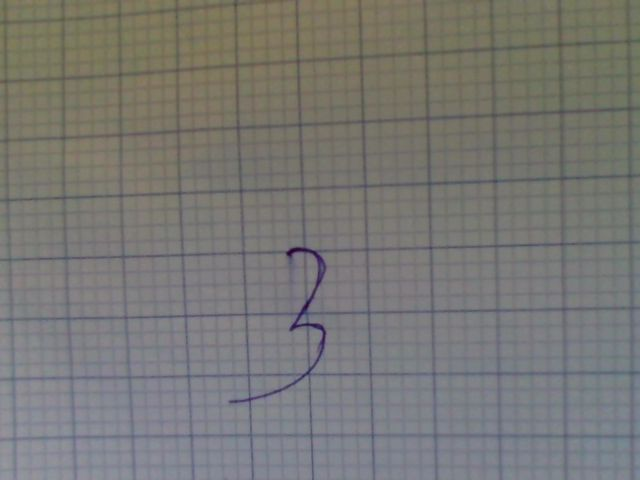

prediction:  [7]


<IPython.core.display.Javascript object>

Saved to photo.jpg


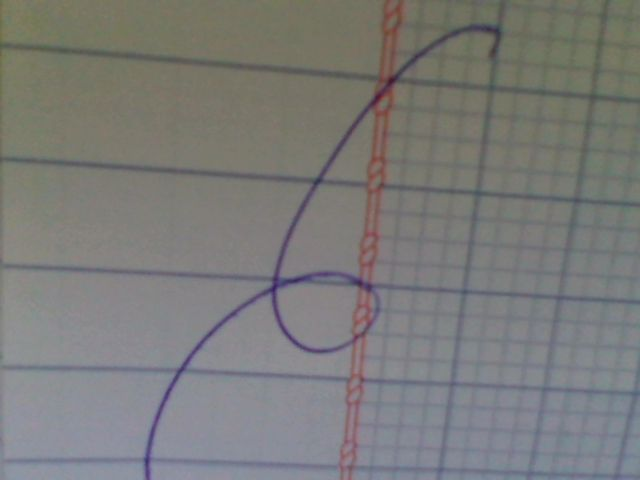

prediction:  [7]


In [13]:
from IPython.display import Image
import cv2
for i in range(10):
  try:
    filename = take_photo()
    print('Saved to {}'.format(filename))
  
  # điều chỉnh kích thước trước khi đưa vào train.
    display(Image(filename))
    image = cv2.imread('photo.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh_binary = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
    ret, thresh_binary = cv2.threshold(thresh_binary, 170, 255, cv2.THRESH_BINARY_INV)
    resize1 = cv2.resize(thresh_binary, (8, 8), interpolation = cv2.INTER_AREA)
    norm_image = cv2.normalize(resize1, None, alpha = 0, beta = 15, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    reshape = norm_image.reshape(-1, 64)
    predict = clf.predict(reshape)
    print("prediction: ",predict)
  
  except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
    print(str(err))

# Trả lời câu hỏi bài tập

# Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?

*   Kết quả chạy thực tế bằng webcam của laptop không giống so với kết quả của dữ liệu test. kết luận : không tốt chút nào.
# Ủa mà nhìn vào đâu để kết luận là tốt hay không?

*  Dựa vào kết quả đầu ra đúng 1/10 tấm đưa vào từ webcam.
# Nếu không tốt thì lý do tại sao?

*   Bước xử lí ảnh chưa được tốt.
*   Chất lượng hình ảnh đưa vào cộng thêm chất lượng webcam còn kém.
*   Số lượng ảnh đưa vào train quá ít nên dẫn đến kết quả không chính xác.
# Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

*   Nếu nhận diện số viết tay tốt thì cũng có thể nhận diện được số trên biển số nhà, vì biển số nhà được viết rõ ràng hơn. 
*   Tuy nhiên vì biển số nhà còn có chữ cái và kí hiệu khác nên việc sử dụng model này sử dụng để nhận diện biển số nhà là không phù hợp.











